지도학습(분류)

- 결정 트리 모델
> 왜 이렇게 분류헀는지 정학!(모델 설명 가능)

=> 머신러닝, 딥러닝 문제점 => XAI

와인 데이터
- 레드와인, 화이트 와인 분류
- 당도, 알코올, pH, Class

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [4]:
wine.head()
# 와인 6497개
# 4가지:실수값
# 누락된 값없음(Nan x)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
# 정규화 필요 -> 알콜, 당도, pH 특징의 크기가 모두 제각각
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


### 3. 데이터 전처리

In [8]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

print(type(target))
print(type(data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
from sklearn.model_selection import train_test_split

# 8:2 비율
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2, random_state=42)

In [12]:
print(len(train_x), len(test_x))

5197 1300


In [17]:
from sklearn.preprocessing import StandardScaler as SS

ss = SS()
ss.fit(train_x)

train_scaled = ss.transform(train_x)
test_scaled = ss.transform(test_x)

### 4. 결정 트리 모델
- 분류결과 설명 가능한 모델

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(train_scaled, train_y)
print(dt.score(train_scaled, train_y))
print(dt.score(test_scaled, test_y))

0.996921300750433
0.8592307692307692


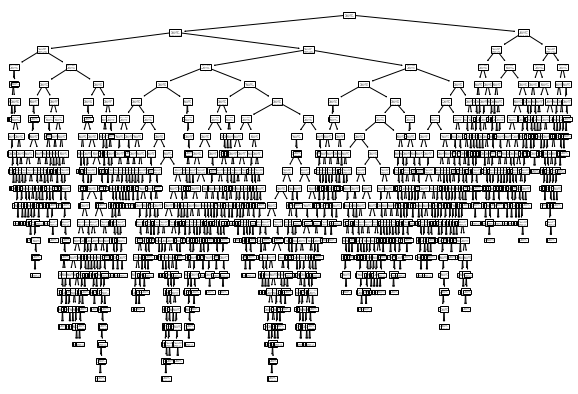

In [29]:
# 트리 모델 시각화
# 트리모델은 나무 거꾸로 한 형상
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

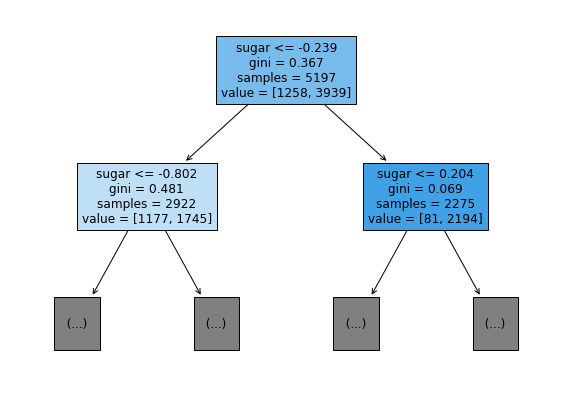

In [30]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alochol', 'sugar', 'pH'])
plt.show()

#### 불순도(gini 계수)
$지니불순도= 1-(음성클래스비율^2 + 양성클래스비율 ^2)$

- 지니계수의 값 0~0.5
- 0.5면 최악(클래스가 모두 동일)
- 0이면 순수 노드(하나의 클래스로 분류됨)
-가지를 쳤을 대 불순도값이 줄어드는 방향으로 학습